## Projeto 3 - Alexandre, Gabriel, Martin, Pedro, Thiago

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from dateutil.relativedelta import relativedelta

Vamos carregar os dados

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# df_limites = pd.read_excel('/content/drive/MyDrive/PI DATA SCIENCE/Módulo 3/PROJETO MÓDULO 3/squadcinza_projeto3/gastos_limites.xlsx', sheet_name='limites')
# df_gastos = pd.read_excel('/content/drive/MyDrive/PI DATA SCIENCE/Módulo 3/PROJETO MÓDULO 3/squadcinza_projeto3/gastos_limites.xlsx', sheet_name='gastos')

In [4]:
df_limites = pd.read_excel('gastos_limites.xlsx', sheet_name='limites')
df_gastos = pd.read_excel('gastos_limites.xlsx', sheet_name='gastos')

Realizada a limpeza de dados do limite, arrumando a data, retirando símbolos, alterando ',' por '.', etc. Deixando os dados aptos para o uso.

In [5]:
df_limites['dt_fechamento'] = pd.to_datetime(df_limites.dt_fechamento, format="%d-%m-%y")
df_limites['limite'] = df_limites['limite'].str.replace('$','', regex=False)
df_limites['limite'] = df_limites['limite'].str.replace('R ','')
df_limites['limite'] = df_limites['limite'].str.replace(',','.')
df_limites['limite'] = pd.to_numeric(df_limites['limite'])
df_limites['cliente'] = df_limites['cliente'].str.title()
df_limites['cliente'] = df_limites['cliente'].str.strip()

In [6]:
df_limites.isnull().sum()

Unnamed: 0       0
cliente          0
limite           0
dt_fechamento    0
dtype: int64

Realizada a limpeza de dados dos gastos, arrumando a data, retirando símbolos, alterando ',' por '.', etc. Deixando os dados aptos para o uso.

In [7]:
df_gastos['dt_operacao'] = pd.to_datetime(df_gastos.dt_operacao, format="%d-%m-%y")
df_gastos['valor_operacao'] = df_gastos['valor_operacao'].str.replace('$','', regex=False)
df_gastos['valor_operacao'] = df_gastos['valor_operacao'].str.replace('R ','')
df_gastos['valor_operacao'] = df_gastos['valor_operacao'].str.replace(',','.')
df_gastos['valor_operacao'] = pd.to_numeric(df_gastos['valor_operacao']) 
df_gastos['mes_atual'] = pd.to_datetime(df_gastos.mes_atual, format='%b/%y')
df_gastos['nm_cliente'] = df_gastos['nm_cliente'].str.title()
df_gastos['nm_cliente'] = df_gastos['nm_cliente'].str.strip()

Função lambda para inverter o Nome, caso contenha a vírgula, pois quando isso ocorre, o Sobrenome vem antes da vírgula.

In [8]:
inverteNome = lambda s : s.split(', ')[1] + ' ' +  s.split(', ')[0] if ', ' in s else s


Aplicada a função lambda em df_gastos e df_limites, utilizando o apply, deixando todos os nomes dos cliente na forma: Nome Sobrenome

In [9]:
df_gastos['nm_cliente'] = df_gastos['nm_cliente'].apply(inverteNome)
df_limites['cliente'] = df_limites['cliente'].apply(inverteNome)

In [10]:
df_gastos.isnull().sum()

Unnamed: 0        0
nm_cliente        0
valor_operacao    0
num_parcelas      0
dt_operacao       0
mes_atual         0
dtype: int64

In [11]:
df_limites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     20 non-null     int64         
 1   cliente        20 non-null     object        
 2   limite         20 non-null     float64       
 3   dt_fechamento  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 768.0+ bytes


In [12]:
df_limites.head()

,Unnamed: 0,cliente,limite,dt_fechamento
0,0,João Silva,2575.0,2021-01-25
1,1,José Silva,4500.0,2021-01-05
2,2,Antônio Oliveira,2325.0,2021-01-25
3,3,Francisco Santos,375.0,2021-01-25
4,4,Carlos Rodrigues,2675.0,2021-01-05


In [13]:
df_gastos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      150 non-null    int64         
 1   nm_cliente      150 non-null    object        
 2   valor_operacao  150 non-null    float64       
 3   num_parcelas    150 non-null    int64         
 4   dt_operacao     150 non-null    datetime64[ns]
 5   mes_atual       150 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(1)
memory usage: 7.2+ KB


In [14]:
df_gastos['dt_operacao'].unique()

array(['2021-01-01T00:00:00.000000000', '2021-01-02T00:00:00.000000000',
       '2021-01-03T00:00:00.000000000', '2021-01-04T00:00:00.000000000',
       '2021-01-05T00:00:00.000000000', '2021-01-06T00:00:00.000000000',
       '2021-01-07T00:00:00.000000000', '2021-01-08T00:00:00.000000000',
       '2021-01-09T00:00:00.000000000', '2021-01-10T00:00:00.000000000',
       '2021-01-11T00:00:00.000000000', '2021-01-12T00:00:00.000000000',
       '2021-01-13T00:00:00.000000000', '2021-01-14T00:00:00.000000000',
       '2021-01-15T00:00:00.000000000', '2021-01-16T00:00:00.000000000',
       '2021-01-17T00:00:00.000000000', '2021-01-18T00:00:00.000000000',
       '2021-01-19T00:00:00.000000000', '2021-01-20T00:00:00.000000000',
       '2021-01-21T00:00:00.000000000', '2021-01-22T00:00:00.000000000',
       '2021-01-23T00:00:00.000000000', '2021-01-24T00:00:00.000000000',
       '2021-01-25T00:00:00.000000000', '2021-01-26T00:00:00.000000000',
       '2021-01-27T00:00:00.000000000', '2021-01-28

Agrupado o df_gastos pela data de operação, mostrando os clientes com o valor da operação

In [15]:
df_gastos_acum = df_gastos.groupby(df_gastos['dt_operacao'].dt.strftime('%B'))[['nm_cliente','valor_operacao']]

In [16]:
df_gastos_acum.head()

,nm_cliente,valor_operacao
0,Paulo Gomes,855.00
1,Camila Santos,504.18
2,Márcia Silva,970.00
3,Maria Alves,2010.31
4,Lucas Oliveira,465.00


Divisão do valor da operação pela quantidade de parcelas indicadas no momento da compra, arrendondando para 2 casas decimais, quando necessário.

In [17]:
df_gastos['valor_parcela']=round((df_gastos['valor_operacao']/df_gastos['num_parcelas']),2)

In [18]:
df_limites.sort_values(by='cliente').head(10)

,Unnamed: 0,cliente,limite,dt_fechamento
12,12,Adriana Pereira,1875.0,2021-01-05
17,17,Aline Rodrigues,2600.0,2021-01-15
11,11,Ana Costa,5375.0,2021-01-25
2,2,Antônio Oliveira,2325.0,2021-01-25
19,19,Camila Santos,3275.0,2021-01-15
4,4,Carlos Rodrigues,2675.0,2021-01-05
15,15,Fernanda Oliveira,2925.0,2021-01-05
3,3,Francisco Santos,375.0,2021-01-25
1,1,José Silva,4500.0,2021-01-05
0,0,João Silva,2575.0,2021-01-25


In [19]:
df_gastos.sort_values(by='nm_cliente').head(10)

,Unnamed: 0,nm_cliente,valor_operacao,num_parcelas,dt_operacao,mes_atual,valor_parcela
74,74,Adriana Pereira,63.88,1,2021-01-14,2021-01-01,63.88
145,145,Adriana Pereira,1084.58,10,2021-01-30,2021-01-01,108.46
118,118,Adriana Pereira,1464.84,2,2021-01-25,2021-01-01,732.42
71,71,Adriana Pereira,2036.00,3,2021-01-14,2021-01-01,678.67
135,135,Adriana Pereira,2056.00,1,2021-01-28,2021-01-01,2056.00
126,126,Adriana Pereira,247.98,3,2021-01-26,2021-01-01,82.66
68,68,Adriana Pereira,764.42,3,2021-01-13,2021-01-01,254.81
130,130,Adriana Pereira,155.56,4,2021-01-27,2021-01-01,38.89
33,33,Aline Rodrigues,234.00,5,2021-01-06,2021-01-01,46.80
56,56,Aline Rodrigues,281.00,1,2021-01-10,2021-01-01,281.00


Realizada a junção do df_gastos com o df_limites, utilizando como chave primária o nome do cliente, assim, teremos os dados que queremos em um único df

In [20]:
df_total = df_limites.merge(df_gastos, left_on='cliente', right_on='nm_cliente', how='left')
df_total.columns


Index(['Unnamed: 0_x', 'cliente', 'limite', 'dt_fechamento', 'Unnamed: 0_y',
       'nm_cliente', 'valor_operacao', 'num_parcelas', 'dt_operacao',
       'mes_atual', 'valor_parcela'],
      dtype='object')

In [21]:
len(df_total['cliente'].unique().tolist())

20

In [22]:
len(df_gastos['nm_cliente'].unique().tolist())

20

In [23]:
df_total.drop(df_total.columns[df_total.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [24]:
df_total.head(3)

,cliente,limite,dt_fechamento,nm_cliente,valor_operacao,num_parcelas,dt_operacao,mes_atual,valor_parcela
0,João Silva,2575.0,2021-01-25,João Silva,243.42,5,2021-01-03,2021-01-01,48.68
1,João Silva,2575.0,2021-01-25,João Silva,1121.00,8,2021-01-15,2021-01-01,140.12
2,João Silva,2575.0,2021-01-25,João Silva,611.00,4,2021-01-16,2021-01-01,152.75


In [25]:
df_total.columns

Index(['cliente', 'limite', 'dt_fechamento', 'nm_cliente', 'valor_operacao',
       'num_parcelas', 'dt_operacao', 'mes_atual', 'valor_parcela'],
      dtype='object')

In [26]:
df_total_com_parcelas = pd.DataFrame(columns=['cliente', 'limite', 'dt_pagamento', 'valor_operacao',
       'num_parcelas', 'num_parcela','dt_operacao', 'valor_parcela'])

In [27]:
df_total.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   cliente         150 non-null    object        
 1   limite          150 non-null    float64       
 2   dt_fechamento   150 non-null    datetime64[ns]
 3   nm_cliente      150 non-null    object        
 4   valor_operacao  150 non-null    float64       
 5   num_parcelas    150 non-null    int64         
 6   dt_operacao     150 non-null    datetime64[ns]
 7   mes_atual       150 non-null    datetime64[ns]
 8   valor_parcela   150 non-null    float64       
dtypes: datetime64[ns](3), float64(3), int64(1), object(2)
memory usage: 11.7+ KB


In [28]:
df_total.isna().sum()

cliente           0
limite            0
dt_fechamento     0
nm_cliente        0
valor_operacao    0
num_parcelas      0
dt_operacao       0
mes_atual         0
valor_parcela     0
dtype: int64

Feito um loop para verificar a quantidade de parcelas e assim criar uma linha pra cada parcela. Verificando o mês de pagamento, comparando-o com a data da operação. Caso a data da operação seja após o fechamento mensal, o pagamento ficará para o mês seguinte.

In [29]:
for i in df_total.values:
    for n in range(int(i[5])):
        
        limite = i[1]
        vencim = i[2]
        cliente = i[0]
        valor= i[4]
        num_parcelas = i[5]
        parcela=i[8]
        data_operacao=i[6]
        mes = 0
        data_pagamento = dt.datetime(data_operacao.year, data_operacao.month,vencim.day)
        data_pagamento = data_pagamento + relativedelta(months=n)
        if data_operacao.day > vencim.day:
            data_pagamento = data_pagamento + relativedelta(months=1)
        
        df_total_com_parcelas.loc[0 if pd.isnull(df_total_com_parcelas.index.max()) else df_total_com_parcelas.index.max() + 1] = [cliente, limite, data_pagamento, valor,
            num_parcelas, str(n+1), data_operacao, parcela]
        #print(i)
    


Conferindo o df, quando a cliente é Adriana Pereira

In [30]:
df_total_com_parcelas[df_total_com_parcelas['cliente']=='Adriana Pereira']

,cliente,limite,dt_pagamento,valor_operacao,num_parcelas,num_parcela,dt_operacao,valor_parcela
412,Adriana Pereira,1875.0,2021-02-05,764.42,3,1,2021-01-13,254.81
413,Adriana Pereira,1875.0,2021-03-05,764.42,3,2,2021-01-13,254.81
414,Adriana Pereira,1875.0,2021-04-05,764.42,3,3,2021-01-13,254.81
415,Adriana Pereira,1875.0,2021-02-05,2036.00,3,1,2021-01-14,678.67
416,Adriana Pereira,1875.0,2021-03-05,2036.00,3,2,2021-01-14,678.67
417,Adriana Pereira,1875.0,2021-04-05,2036.00,3,3,2021-01-14,678.67
418,Adriana Pereira,1875.0,2021-02-05,63.88,1,1,2021-01-14,63.88
419,Adriana Pereira,1875.0,2021-02-05,1464.84,2,1,2021-01-25,732.42
420,Adriana Pereira,1875.0,2021-03-05,1464.84,2,2,2021-01-25,732.42
421,Adriana Pereira,1875.0,2021-02-05,247.98,3,1,2021-01-26,82.66


In [31]:
df_total_com_parcelas

,cliente,limite,dt_pagamento,valor_operacao,num_parcelas,num_parcela,dt_operacao,valor_parcela
0,João Silva,2575.0,2021-01-25,243.42,5,1,2021-01-03,48.68
1,João Silva,2575.0,2021-02-25,243.42,5,2,2021-01-03,48.68
2,João Silva,2575.0,2021-03-25,243.42,5,3,2021-01-03,48.68
3,João Silva,2575.0,2021-04-25,243.42,5,4,2021-01-03,48.68
4,João Silva,2575.0,2021-05-25,243.42,5,5,2021-01-03,48.68
...,...,...,...,...,...,...,...,...
564,Camila Santos,3275.0,2021-03-15,203.01,3,2,2021-01-29,67.67
565,Camila Santos,3275.0,2021-04-15,203.01,3,3,2021-01-29,67.67
566,Camila Santos,3275.0,2021-02-15,702.00,3,1,2021-01-30,234.00
567,Camila Santos,3275.0,2021-03-15,702.00,3,2,2021-01-30,234.00


In [32]:
result = df_total_com_parcelas.copy()

In [33]:
result[result['cliente']== 'Adriana Pereira']

,cliente,limite,dt_pagamento,valor_operacao,num_parcelas,num_parcela,dt_operacao,valor_parcela
412,Adriana Pereira,1875.0,2021-02-05,764.42,3,1,2021-01-13,254.81
413,Adriana Pereira,1875.0,2021-03-05,764.42,3,2,2021-01-13,254.81
414,Adriana Pereira,1875.0,2021-04-05,764.42,3,3,2021-01-13,254.81
415,Adriana Pereira,1875.0,2021-02-05,2036.00,3,1,2021-01-14,678.67
416,Adriana Pereira,1875.0,2021-03-05,2036.00,3,2,2021-01-14,678.67
417,Adriana Pereira,1875.0,2021-04-05,2036.00,3,3,2021-01-14,678.67
418,Adriana Pereira,1875.0,2021-02-05,63.88,1,1,2021-01-14,63.88
419,Adriana Pereira,1875.0,2021-02-05,1464.84,2,1,2021-01-25,732.42
420,Adriana Pereira,1875.0,2021-03-05,1464.84,2,2,2021-01-25,732.42
421,Adriana Pereira,1875.0,2021-02-05,247.98,3,1,2021-01-26,82.66


Transformando o num_parcela em inteiro

In [34]:
result['num_parcela'] = result['num_parcela'].apply(lambda x: int(x))

In [35]:
result = result.sort_values(by=['num_parcela'], ascending = True)

Agrupando pelo número da parcela e o cliente, mostrando o somatório do valor para aquela parcela

In [36]:
result.groupby([result['num_parcela'], result['cliente']]).agg({'valor_parcela':sum}).head(30)

valor_parcela
num_parcela cliente                         
1           Adriana Pereira          4015.79
            Aline Rodrigues          1197.12
            Ana Costa                1004.91
            Antônio Oliveira         2818.58
            Camila Santos            2749.15
            Carlos Rodrigues         1147.23
            Fernanda Oliveira         950.18
            Francisco Santos         1824.01
            José Silva               2268.54
            João Silva               1644.07
            Juliana Costa            3531.91
            Lucas Oliveira           2973.97
            Luiz Alves               1525.83
            Marcos Souza              950.49
            Maria Alves              2526.12
            Márcia Silva             4420.39
            Patrícia Pereira          639.47
            Paulo Gomes              3539.76
            Pedro Ribeira             399.43
            Sandra Souza             2654.69
2           Adriana Pereira          1895.91
            Aline Rodrigues           113.00
            Ana Costa                1004.91
            Antônio Oliveira         1253.26
            Camila Santos             930.15
            Carlos Rodrigues         1147.23
            Fernanda Oliveira         950.18
            Francisco Santos         1452.02
            José Silva                498.70
            João Silva                900.07

Atribuindo o mês para result['mes_parcela'] e depois agrupando pelo mês e cliente, trazendo o somatório das parcelas para aquele mês

In [37]:
result['mes_parcela'] = result['dt_pagamento'].apply(lambda x: x.strftime('%b'))

In [38]:
result.groupby([result['mes_parcela'], result['cliente']]).agg({'valor_parcela':sum}).head(4)

valor_parcela
mes_parcela cliente                        
Apr         Adriana Pereira         1163.49
            Aline Rodrigues          113.00
            Ana Costa                949.24
            Antônio Oliveira         228.61

In [39]:
dfResult = result.groupby([result['num_parcela'], result['mes_parcela'], result['cliente'], result['limite']]).agg({'valor_parcela':sum}).reset_index()

In [40]:
# dfResult.style.applymap(color_negative_red, subset=['valor'])

In [41]:
dfResult.columns = ['parcela', 'mes','cliente','limite', 'valor']


In [42]:
dfResult

,parcela,mes,cliente,limite,valor
0,1,Feb,Adriana Pereira,1875.0,4015.79
1,1,Feb,Ana Costa,5375.0,231.98
2,1,Feb,Antônio Oliveira,2325.0,37.68
3,1,Feb,Camila Santos,3275.0,2120.67
4,1,Feb,Carlos Rodrigues,2675.0,1061.46
...,...,...,...,...,...
210,10,Nov,José Silva,4500.0,76.28
211,10,Oct,Francisco Santos,375.0,88.90
212,10,Oct,Luiz Alves,2575.0,391.14
213,10,Oct,Marcos Souza,3050.0,191.65


Criação de um novo dfResult3, agrupando pelo mês, cliente e limite, trazendo o somatório do valor.

In [43]:
dfResult3 = dfResult.groupby(['mes','cliente', 'limite'])['valor'].sum().reset_index()

Criação de uma função para converter em valor negativo caso o valor é maior do que o limite estipulado

In [44]:
# def limite(valor, limite):
#     if valor > limite:
#         return float(-valor)
#     else:
#         return float(valor)

In [45]:
# dfResult3['valor'] = dfResult3.apply(lambda x: limite(x['valor'], x['limite']), axis=1)

In [46]:
dfResult3[dfResult3['cliente']== 'Adriana Pereira']

,mes,cliente,limite,valor
0,Apr,Adriana Pereira,1875.0,1163.49
20,Aug,Adriana Pereira,1875.0,108.46
31,Feb,Adriana Pereira,1875.0,4015.79
70,Jul,Adriana Pereira,1875.0,108.46
81,Jun,Adriana Pereira,1875.0,108.46
97,Mar,Adriana Pereira,1875.0,1895.91
117,May,Adriana Pereira,1875.0,147.35
135,Nov,Adriana Pereira,1875.0,108.46
137,Oct,Adriana Pereira,1875.0,108.46
144,Sep,Adriana Pereira,1875.0,108.46


In [47]:
dfFinal = dfResult3.pivot(columns=['mes'], index = ['cliente','limite'], values='valor').reset_index()

Reajustando as colunas pelos meses conforme o calendário

In [48]:
dfFinal.columns

Index(['cliente', 'limite', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun',
       'Mar', 'May', 'Nov', 'Oct', 'Sep'],
      dtype='object', name='mes')

In [49]:
dfFinal2 = dfFinal[['cliente', 'limite', 'Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]

Substituindo os NA por 0

In [50]:
dfFinal2.fillna(0)

mes,cliente,limite,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Adriana Pereira,1875.0,0.00,4015.79,1895.91,1163.49,147.35,108.46,108.46,108.46,108.46,108.46,108.46,0.00
1,Aline Rodrigues,2600.0,1197.12,113.00,113.00,113.00,113.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Ana Costa,5375.0,772.93,1004.91,1004.91,949.24,556.38,123.73,123.73,123.73,123.73,123.73,0.00,0.00
3,Antônio Oliveira,2325.0,2780.90,1253.26,632.66,228.61,95.69,37.68,0.00,0.00,0.00,0.00,0.00,0.00
4,Camila Santos,3275.0,628.48,2749.15,345.06,345.06,43.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,Carlos Rodrigues,2675.0,85.77,1147.23,1147.23,965.23,879.46,879.46,131.73,131.73,0.00,0.00,0.00,0.00
6,Fernanda Oliveira,2925.0,156.25,950.18,950.18,509.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,Francisco Santos,375.0,1416.80,1824.01,461.50,461.50,366.60,284.40,249.18,88.90,88.90,88.90,0.00,0.00
8,José Silva,4500.0,1046.00,1222.54,498.70,405.10,156.77,76.28,76.28,76.28,76.28,76.28,76.28,76.28
9,João Silva,2575.0,1442.06,900.07,843.07,843.07,390.81,140.12,140.12,140.12,0.00,0.00,0.00,0.00


In [51]:
# def color_red(value):
#     color = 'black'
#     if value < 0:
#         color = 'red'
 
#     return 'color: %s' % color

In [52]:
# dfFinal2.style.applymap(color_red, subset=['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

In [53]:
dfFinal.reset_index()

mes,index,cliente,limite,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,Adriana Pereira,1875.0,1163.49,108.46,NaN,4015.79,NaN,108.46,108.46,1895.91,147.35,108.46,108.46,108.46
1,1,Aline Rodrigues,2600.0,113.00,NaN,NaN,113.00,1197.12,NaN,NaN,113.00,113.00,NaN,NaN,NaN
2,2,Ana Costa,5375.0,949.24,123.73,NaN,1004.91,772.93,123.73,123.73,1004.91,556.38,NaN,123.73,123.73
3,3,Antônio Oliveira,2325.0,228.61,NaN,NaN,1253.26,2780.90,NaN,37.68,632.66,95.69,NaN,NaN,NaN
4,4,Camila Santos,3275.0,345.06,NaN,NaN,2749.15,628.48,NaN,NaN,345.06,43.39,NaN,NaN,NaN
5,5,Carlos Rodrigues,2675.0,965.23,131.73,NaN,1147.23,85.77,131.73,879.46,1147.23,879.46,NaN,NaN,NaN
6,6,Fernanda Oliveira,2925.0,509.88,NaN,NaN,950.18,156.25,NaN,NaN,950.18,NaN,NaN,NaN,NaN
7,7,Francisco Santos,375.0,461.50,88.90,NaN,1824.01,1416.80,249.18,284.40,461.50,366.60,NaN,88.90,88.90
8,8,José Silva,4500.0,405.10,76.28,76.28,1222.54,1046.00,76.28,76.28,498.70,156.77,76.28,76.28,76.28
9,9,João Silva,2575.0,843.07,140.12,NaN,900.07,1442.06,140.12,140.12,843.07,390.81,NaN,NaN,NaN


In [54]:
#!pip install fpdf2
from fpdf import FPDF, HTMLMixin
import pandas as pd 

class PDF(FPDF, HTMLMixin):
    def __init__(self, orientation):

        super().__init__(orientation)
        
        #função para arrendondar com 2 casas decimais e trazer o cifrão R$
    def roundAndString(self, x):
        return "R$ {:0.2f}".format(x)
    
        #função que será utilizada pra verificar condição para colorir em vermelho  
    def check(self, list1, val):
        for x in list1:
            if x >= val:
                return True
        return False
    
        #função para gerar PDF nas configurações propostas
    def generatePDFfromDF(self, df):
        self.add_page()
        pdf.set_font("Times", size=10)
        line_height = pdf.font_size * 2.4
        col_width_Cliente = (pdf.epw / 14) * 1.5  # distribute content evenly
        col_width_resto = (pdf.epw / 14) - ((pdf.epw / 14) * 1.4) / 13  # distribute content evenly
        col_width_resto *= 1.11
        pdf.set_fill_color(0,64,128)
        pdf.set_text_color(255,255,255)
        pdf.multi_cell(col_width_Cliente, line_height, "Cliente", border=1, ln=3, max_line_height=pdf.font_size, fill=True)
        pdf.multi_cell(col_width_resto, line_height, "Limite", border=1, ln=3, max_line_height=pdf.font_size, fill=True)
        pdf.multi_cell(col_width_resto, line_height, "Jan", border=1, ln=3, max_line_height=pdf.font_size, align="C", fill=True)
        pdf.multi_cell(col_width_resto, line_height, "Feb", border=1, ln=3, max_line_height=pdf.font_size, align="C", fill=True)
        pdf.multi_cell(col_width_resto, line_height, "Mar", border=1, ln=3, max_line_height=pdf.font_size, align="C", fill=True)
        pdf.multi_cell(col_width_resto, line_height, "Apr", border=1, ln=3, max_line_height=pdf.font_size, align="C", fill=True)
        pdf.multi_cell(col_width_resto, line_height, "Mai", border=1, ln=3, max_line_height=pdf.font_size, align="C", fill=True)
        pdf.multi_cell(col_width_resto, line_height, "Jun", border=1, ln=3, max_line_height=pdf.font_size, align="C", fill=True)
        pdf.multi_cell(col_width_resto, line_height, "Jul", border=1, ln=3, max_line_height=pdf.font_size, align="C", fill=True)
        pdf.multi_cell(col_width_resto, line_height, "Ago", border=1, ln=3, max_line_height=pdf.font_size, align="C", fill=True)
        pdf.multi_cell(col_width_resto, line_height, "Set", border=1, ln=3, max_line_height=pdf.font_size, align="C", fill=True)
        pdf.multi_cell(col_width_resto, line_height, "Out", border=1, ln=3, max_line_height=pdf.font_size, align="C", fill=True)
        pdf.multi_cell(col_width_resto, line_height, "Nov", border=1, ln=3, max_line_height=pdf.font_size, align="C", fill=True)
        pdf.multi_cell(col_width_resto, line_height, "Dec", border=1, ln=3, max_line_height=pdf.font_size, align="C", fill=True)
        pdf.ln(line_height)
        for row in df.values:
            cliente = row[0]
            if self.check(row[-12:], row[1]):
                pdf.set_text_color(255,0,0)
            else:
                pdf.set_text_color(0,0,0)
            
            pdf.multi_cell(col_width_Cliente, line_height, cliente, border=1, ln=3, max_line_height=pdf.font_size)
            pdf.set_text_color(0,0,0)
            limite = row[1]
            pdf.multi_cell(col_width_resto, line_height, self.roundAndString(limite), border=1, ln=3, max_line_height=pdf.font_size, align="R")
            Jan = row[2]
            if(Jan>=limite):
                pdf.set_text_color(255,0,0)
            else:
                pdf.set_text_color(0,0,0)
            pdf.multi_cell(col_width_resto, line_height, self.roundAndString(Jan), border=1, ln=3, max_line_height=pdf.font_size, align="R")
            Fev = row[3]
            if(Fev>=limite):
                pdf.set_text_color(255,0,0)
            else:
                pdf.set_text_color(0,0,0)
            pdf.multi_cell(col_width_resto, line_height, self.roundAndString(Fev), border=1, ln=3, max_line_height=pdf.font_size, align="R")
            Mar = row[4]
            if(Mar>=limite):
                pdf.set_text_color(255,0,0)
            else:
                pdf.set_text_color(0,0,0)
            pdf.multi_cell(col_width_resto, line_height, self.roundAndString(Mar), border=1, ln=3, max_line_height=pdf.font_size, align="R")
            Apr = row[5]
            if(Apr>=limite):
                pdf.set_text_color(255,0,0)
            else:
                pdf.set_text_color(0,0,0)
            pdf.multi_cell(col_width_resto, line_height, self.roundAndString(Apr), border=1, ln=3, max_line_height=pdf.font_size, align="R")
            May = row[6]
            if(May>=limite):
                pdf.set_text_color(255,0,0)
            else:
                pdf.set_text_color(0,0,0)
            pdf.multi_cell(col_width_resto, line_height, self.roundAndString(May), border=1, ln=3, max_line_height=pdf.font_size, align="R")
            Jun = row[7]
            if(Jun>=limite):
                pdf.set_text_color(255,0,0)
            else:
                pdf.set_text_color(0,0,0)
            pdf.multi_cell(col_width_resto, line_height, self.roundAndString(Jun), border=1, ln=3, max_line_height=pdf.font_size, align="R")
            Jul = row[8]
            if(Jul>=limite):
                pdf.set_text_color(255,0,0)
            else:
                pdf.set_text_color(0,0,0)
            pdf.multi_cell(col_width_resto, line_height, self.roundAndString(Jul), border=1, ln=3, max_line_height=pdf.font_size, align="R")
            Ago = row[9]
            if(Ago>=limite):
                pdf.set_text_color(255,0,0)
            else:
                pdf.set_text_color(0,0,0)
            pdf.multi_cell(col_width_resto, line_height, self.roundAndString(Ago), border=1, ln=3, max_line_height=pdf.font_size, align="R")
            Sep = row[10]
            if(Sep>=limite):
                pdf.set_text_color(255,0,0)
            else:
                pdf.set_text_color(0,0,0)
            pdf.multi_cell(col_width_resto, line_height, self.roundAndString(Sep), border=1, ln=3, max_line_height=pdf.font_size, align="R")
            Oct = row[11]
            if(Oct>=limite):
                pdf.set_text_color(255,0,0)
            else:
                pdf.set_text_color(0,0,0)
            pdf.multi_cell(col_width_resto, line_height, self.roundAndString(Oct), border=1, ln=3, max_line_height=pdf.font_size, align="R")
            Nov = row[12]
            if(Nov>=limite):
                pdf.set_text_color(255,0,0)
            else:
                pdf.set_text_color(0,0,0)
            pdf.multi_cell(col_width_resto, line_height, self.roundAndString(Nov), border=1, ln=3, max_line_height=pdf.font_size, align="R")
            Dec= row[13]
            if(Dec>=limite):
                pdf.set_text_color(255,0,0)
            else:
                pdf.set_text_color(0,0,0)
            pdf.multi_cell(col_width_resto, line_height, self.roundAndString(Dec), border=1, ln=3, max_line_height=pdf.font_size, align="R")
            pdf.set_text_color(0,0,0)
            pdf.ln(line_height)
        # pd.set_option('display.max_colwidth', 40)
        # html = df.to_html(col_space='40px', index=False)
        
        # html = str(html).replace("style=\"min-width: 40px;\"", "width='40'")
        # html = str(html).replace("<th>mes</th>", "")
        # html = str(html).replace("<th></th>", "")
        # print(html)
        # #print(html)
        # self.write_html(html)

        self.output("relatorio_consumo.pdf")

In [55]:
dfFinal2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cliente  20 non-null     object 
 1   limite   20 non-null     float64
 2   Jan      19 non-null     float64
 3   Feb      20 non-null     float64
 4   Mar      20 non-null     float64
 5   Apr      20 non-null     float64
 6   May      18 non-null     float64
 7   Jun      16 non-null     float64
 8   Jul      11 non-null     float64
 9   Aug      10 non-null     float64
 10  Sep      8 non-null      float64
 11  Oct      7 non-null      float64
 12  Nov      2 non-null      float64
 13  Dec      1 non-null      float64
dtypes: float64(13), object(1)
memory usage: 2.3+ KB


In [56]:
dfFinal2.fillna(0, inplace=True)

In [57]:
dfFinal2.values[1][-12:]

array([1197.1200000000001, 113.0, 113.0, 113.0, 113.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0], dtype=object)

In [58]:
def check( list1, val):
        for x in list1:
            if x >= val:
                return False
        return True

In [59]:
check(dfFinal2.values[0][-12:],dfFinal2.values[0][1])

False

In [60]:
pdf = PDF(orientation="landscape")
pd.set_option('display.max_colwidth', 40)
pdf.generatePDFfromDF(dfFinal2)

# Análise exploratória dos dados 

In [61]:
# check dataframe as primeiras 5 linhas 

df_total.head()

,cliente,limite,dt_fechamento,nm_cliente,valor_operacao,num_parcelas,dt_operacao,mes_atual,valor_parcela
0,João Silva,2575.0,2021-01-25,João Silva,243.42,5,2021-01-03,2021-01-01,48.68
1,João Silva,2575.0,2021-01-25,João Silva,1121.00,8,2021-01-15,2021-01-01,140.12
2,João Silva,2575.0,2021-01-25,João Silva,611.00,4,2021-01-16,2021-01-01,152.75
3,João Silva,2575.0,2021-01-25,João Silva,744.00,1,2021-01-17,2021-01-01,744.00
4,João Silva,2575.0,2021-01-25,João Silva,703.02,4,2021-01-19,2021-01-01,175.76


In [62]:
# dimensão do dataframe

print('O dataframe possui um total de:',df_total.shape[0],'linhas',df_total.shape[1],'colunas')

O dataframe possui um total de: 150 linhas 9 colunas


In [63]:
# Informações sobre o dataframe

df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   cliente         150 non-null    object        
 1   limite          150 non-null    float64       
 2   dt_fechamento   150 non-null    datetime64[ns]
 3   nm_cliente      150 non-null    object        
 4   valor_operacao  150 non-null    float64       
 5   num_parcelas    150 non-null    int64         
 6   dt_operacao     150 non-null    datetime64[ns]
 7   mes_atual       150 non-null    datetime64[ns]
 8   valor_parcela   150 non-null    float64       
dtypes: datetime64[ns](3), float64(3), int64(1), object(2)
memory usage: 11.7+ KB


In [64]:
# contabilizando os dados nulos
df_total.isnull().sum()

cliente           0
limite            0
dt_fechamento     0
nm_cliente        0
valor_operacao    0
num_parcelas      0
dt_operacao       0
mes_atual         0
valor_parcela     0
dtype: int64

In [65]:
# colunas do df
df_total.columns

Index(['cliente', 'limite', 'dt_fechamento', 'nm_cliente', 'valor_operacao',
       'num_parcelas', 'dt_operacao', 'mes_atual', 'valor_parcela'],
      dtype='object')

In [66]:
# Inserindo uma nova coluna com os dias da semana

df_total['dt_operacao'] = pd.to_datetime(df_total['dt_operacao'])
df_total['day_of_week'] = df_total['dt_operacao'].dt.day_name()


In [67]:
# df com a nova coluna 'day_of_week' 

df_total

,cliente,limite,dt_fechamento,nm_cliente,valor_operacao,num_parcelas,dt_operacao,mes_atual,valor_parcela,day_of_week
0,João Silva,2575.0,2021-01-25,João Silva,243.42,5,2021-01-03,2021-01-01,48.68,Sunday
1,João Silva,2575.0,2021-01-25,João Silva,1121.00,8,2021-01-15,2021-01-01,140.12,Friday
2,João Silva,2575.0,2021-01-25,João Silva,611.00,4,2021-01-16,2021-01-01,152.75,Saturday
3,João Silva,2575.0,2021-01-25,João Silva,744.00,1,2021-01-17,2021-01-01,744.00,Sunday
4,João Silva,2575.0,2021-01-25,João Silva,703.02,4,2021-01-19,2021-01-01,175.76,Tuesday
...,...,...,...,...,...,...,...,...,...,...
145,Camila Santos,3275.0,2021-01-15,Camila Santos,216.97,5,2021-01-05,2021-01-01,43.39,Tuesday
146,Camila Santos,3275.0,2021-01-15,Camila Santos,666.00,2,2021-01-08,2021-01-01,333.00,Friday
147,Camila Santos,3275.0,2021-01-15,Camila Santos,1819.00,1,2021-01-26,2021-01-01,1819.00,Tuesday
148,Camila Santos,3275.0,2021-01-15,Camila Santos,203.01,3,2021-01-29,2021-01-01,67.67,Friday


In [68]:
# Estatistica simples de todas as colunas numéricas
df_total.describe()

,limite,valor_operacao,num_parcelas,valor_parcela
count,150.000000,150.000000,150.000000,150.000000
mean,3028.333333,718.019400,3.793333,285.210933
std,1489.472753,646.223867,2.329550,359.091515
min,375.000000,63.880000,1.000000,21.600000
25%,2200.000000,324.227500,2.000000,87.175000
50%,2600.000000,540.885000,4.000000,156.955000
75%,4500.000000,851.025000,5.000000,314.950000
max,5375.000000,4398.000000,11.000000,2081.000000


In [69]:
df_total.groupby(["cliente", "dt_operacao", "day_of_week"], dropna=False)[["day_of_week"]].count()

day_of_week
cliente         dt_operacao day_of_week             
Adriana Pereira 2021-01-13  Wednesday              1
                2021-01-14  Thursday               2
                2021-01-25  Monday                 1
                2021-01-26  Tuesday                1
                2021-01-27  Wednesday              1
...                                              ...
Sandra Souza    2021-01-05  Tuesday                1
                2021-01-06  Wednesday              1
                2021-01-16  Saturday               1
                2021-01-25  Monday                 1
                2021-01-28  Thursday               1

[137 rows x 1 columns]

In [70]:
df_total.columns

Index(['cliente', 'limite', 'dt_fechamento', 'nm_cliente', 'valor_operacao',
       'num_parcelas', 'dt_operacao', 'mes_atual', 'valor_parcela',
       'day_of_week'],
      dtype='object')

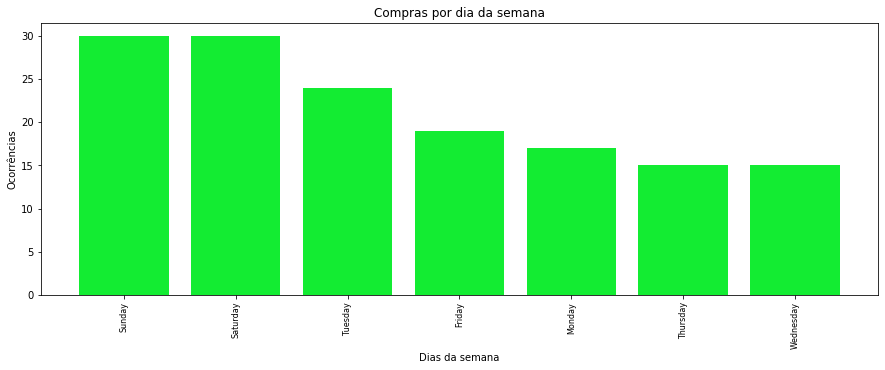

In [71]:
# Gráfico de compras por dia da semana

x=df_total.day_of_week.value_counts()
plt.figure(figsize=(15,5))
plt.bar(x.index,x.values,color='#13ec32')
plt.xticks(x.index,rotation='vertical',size=8)
plt.ylabel('Ocorrências')
plt.xlabel('Dias da semana')
plt.title('Compras por dia da semana')
plt.show()

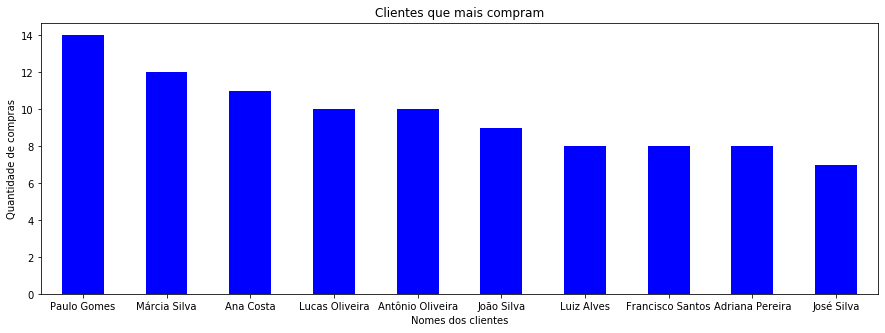

In [72]:
# clientes que mais realizam compras

df_total['cliente'].value_counts().head(10).plot(kind='bar',
                                                figsize=(15,5),
                                                grid=False,
                                                rot=0,
                                                color='blue')
plt.title('Clientes que mais compram')
plt.xlabel('Nomes dos clientes')
plt.ylabel('Quantidade de compras')
plt.show()


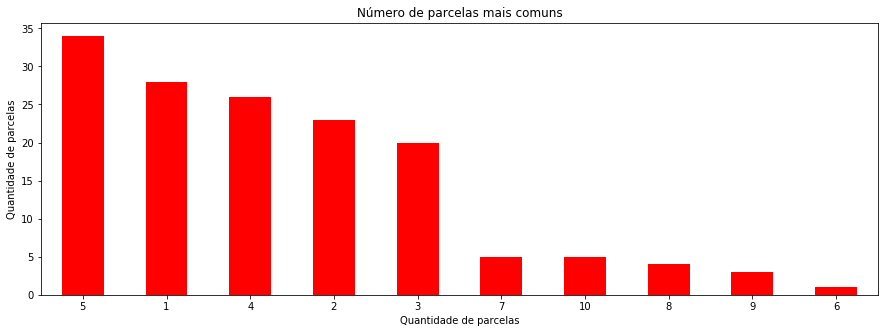

In [73]:
# número de parcelas mais comuns

df_total['num_parcelas'].value_counts().head(10).plot(kind='bar',
                                                figsize=(15,5),
                                                grid=False,
                                                rot=0,
                                                color='red')
plt.title('Número de parcelas mais comuns')
plt.xlabel('Quantidade de parcelas')
plt.ylabel('Quantidade de parcelas')
plt.show()


In [74]:
# Qual foi a compra mais cara?

df_total['valor_operacao'].max()

4398.0

In [75]:
# Qual foi a compra mais barata?
df_total['valor_operacao'].min()

63.88

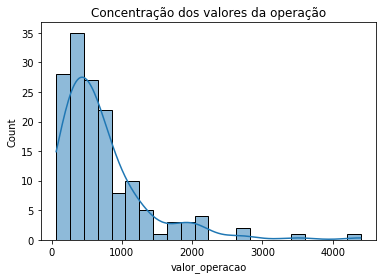

In [76]:
sns.histplot(data=df_total, x="valor_operacao", kde=True)
plt.title('Concentração dos valores da operação')
plt.show()


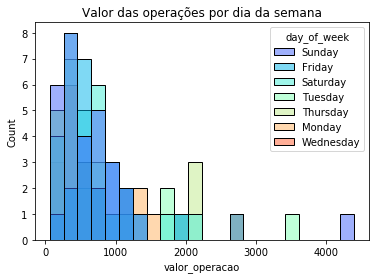

In [77]:
sns.histplot(data=df_total, x="valor_operacao", hue="day_of_week", palette="rainbow")
plt.title('Valor das operações por dia da semana')
plt.show()

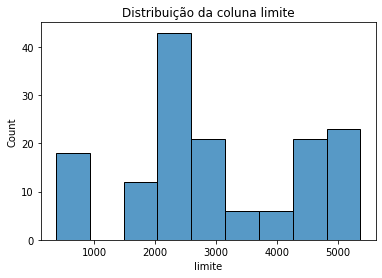

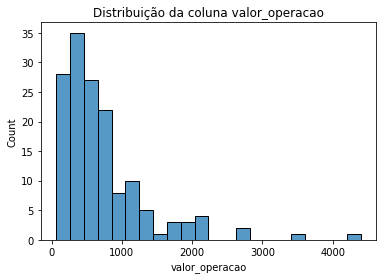

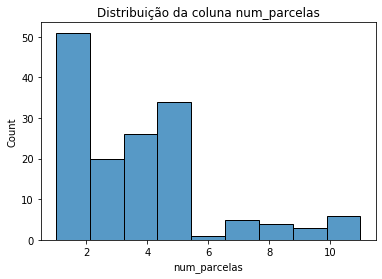

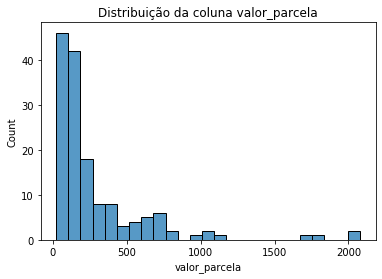

In [78]:
# plot de distribuição para as  demais colunas numericas.

for col in df_total.select_dtypes(include=np.number).columns:
    
    plt.title("Distribuição da coluna {}".format(col))
    
    sns.histplot(df_total, x=col)
    
    plt.show()

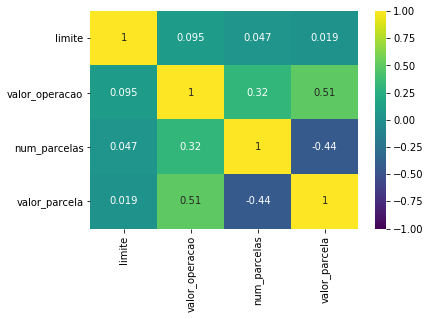

In [79]:
sns.heatmap(df_total.corr(), vmin=-1, vmax=1, annot=True, cmap="viridis")

Vi que tem uma relação forte entre valor da operação e valor da parcela. 

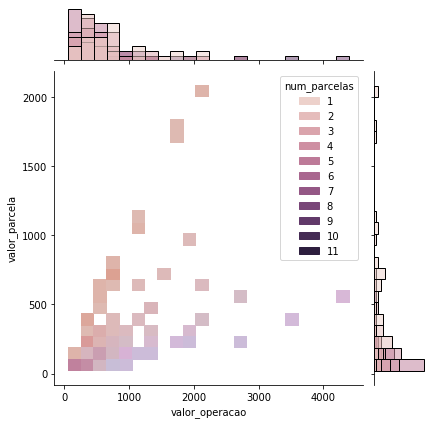

In [80]:
sns.jointplot(data=df_total, x='valor_operacao', y='valor_parcela', hue='num_parcelas', kind='hist')

A partir de 2000 as pessoas tem costume em dividr em mais parcelas. 

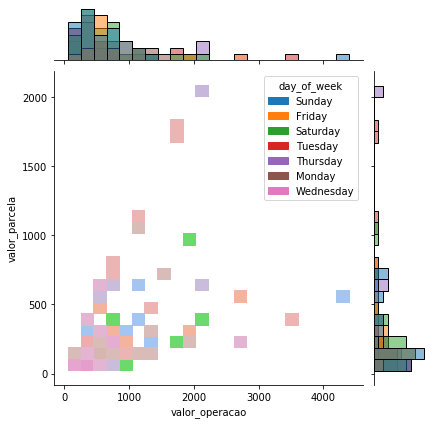

In [81]:
sns.jointplot(data=df_total, x='valor_operacao', y='valor_parcela', hue='day_of_week', kind='hist')

Aqui mostra que compras pequenas avistas acontecem mais na quarta-feira.